# Neural & Behavioral Modeling - Week 1 (Exercises)
by 李瓖芸 (b04901005@ntu.edu.tw)

In [5]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Party Simulation (5 points)
This is a model of a cocktail party. The men and women at the party form groups. A party-goer becomes uncomfortable and switches groups if their current group has too many members of the opposite sex. What types of group result?

### 1.1 Insert your codes to complete the simulation (2 points)

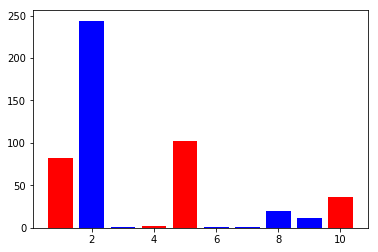

In [19]:
# Model parameters:
Ngroups=10
Npeople=500
Tolerance=.25# tolerable propotion of the opposite sex

# Supporting functions:
class Person:
    def __init__(self, Ngroups):
        self.sex = random.randint(2) # 0=woman; 1=man
        self.Ngroups=Ngroups
        self.group = random.randint(Ngroups) # staying in which group?
        
    def leave(self):
        options=delete(arange(self.Ngroups),self.group) # except the current group
        self.group = int(random.choice(options,1)) # choosing a new group
    
def party_stats(people): # calculate the number of men & women in each group
    Npeople=len(people)    
    sexes=[people[i].sex for i in range(Npeople)]
    groups=[people[i].group for i in range(Npeople)]
    counts=zeros((max(groups)+1,max(sexes)+1))
    proportions=counts.copy()
    for p in range(Npeople):
        counts[groups[p],sexes[p]]+=1
    men_plus_women=sum(counts,1) # number of men and women in each group
    men_plus_women[men_plus_women==0]=inf # to avoid "dividing by zeros later
    proportions[:,0]=counts[:,0]/men_plus_women # proportion of women in each group
    proportions[:,1]=counts[:,1]/men_plus_women # proportion of men in each group
    return counts, proportions # size=group*sex

def plot_party(counts):
    x=arange(len(counts))+1 # number of groups
    clf() # clear previous figure
    bar(x, counts[:,0], color = 'r') # women
    bar(x, counts[:,1], color = 'b', bottom = counts[:,0]) # men on top of women in the plot
    display(gcf()); clear_output(wait=True) # to allow dynamic plots
    
# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group
Nhappy=0 # Number of happy people

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    # Insert your codes here to make everyone happy:
    counts, proportions = party_stats(people)
    for person in people:
        if proportions[person.group, person.sex]<1-Tolerance:
            person.leave()
        else: 
            Nhappy+=1
    # Plot new results:
    counts, proportions=party_stats(people) # size=group*sex
    plot_party(counts)

### 1.2 Modify the three model parameters & discuss how each affects convergence of the simulation (2 points)

If Tolerance>50%, the system may converge to a distribution that some of the groups have both of the sexes. Otherwise, the system can only converge to single-sex groups or diverges.
With a larger average number of people in each group (Npeople/Ngroups), the convergence time increases.

### 1.3 Discuss why the simulaiton leads to group polarization (1 point)

If a group includes both of the sexes, whatever the proportion is, one of the sexes must experience an environment with the number of the opposite sex reaching or exceeding 50%.
Hence, with the Tolerance set to a number smaller than 50%, there must be some people in any non-polar group who feel uncomfortable and leave. The only possible stable distribution is hence groups with only one sex.

## 2 Understand Shunting Equation (5 points)

$\frac{dy}{dt}=-Ay+(B-y)*E-(y-C)*I$

### 2.1 Find its equilibrium by analytically solving $dy/dt=0$ (1 point)

\begin{align*}
&\frac{dy}{dt}=-Ay+(B-y)*E-(y-C)*I=0 \\
&(-A-E-I)y+BE+CI=0 \\
&y=\frac{BE+CI}{A+E+I}
\end{align*}

### 2.2 Use Euler integration to verify your answer in 2.1 with your own (A, B, C, E, I) constants (2 points)


In [7]:
# Write your simulation codes here

### 2.3 Combining math & if-then controls in numerical integrations (2 points)

Use Euler integration to plot $dy/dt=-y(t)+E$ where
$E=\begin{cases}
    1  &  \text{if } t<5\\
    0  &  \text{if } t>5
   \end{cases}$
for t=[0,10] & y(t=0)=0.

This is an example of time-varying rather than constant excitation.

In [4]:
# Write your simulation codes here